# Exercise Fourteen: Project Design Starter
In this exercise, you'll be planning out a complex project. You'll draw in some code, but focus on commenting to describe your project structure. The sample document below will guide you through organizing and annotating your project design. The primary components you'll include are:

- Dependencies: What modules will your project need?
- Collection: Where is your data coming from?
- Processing: How will you format and process your data?
- Analysis: What techniques will you use to understand your data?
- Visualization: How will you visualize and explore your data?

Don't worry if you aren't exactly certain how you would implement everything - this should be a starting point for a larger research study, but it doesn't need to be a complete, functional workflow. Aim for a "good enough" starting point that you can reference and extend for future work.

Note where you have something working, and where it's broken or in progress.

Race After Technology: Chapter 5
Digital Humanities Coursebook: Coda

And to help push the technical philosophy further and keep the process moving was knowing that "An interface is a set of cognitive cues. It may look like a screen full of pictures of things inside the computer, but in fact, the interface mediates between an individual the computational activity" (Drucker 176).

"When people change how they speak or act in order to conform to dominant norms, we call it “code-switching”" (Benjamin 180). 

"Data, in short, do not speak for themselves and don’t always change hearts and minds or policy" (Benjamin 192). 

## Project Overview: NaNoGenMo
This sample project builds on our previous exercises inspired by National Novel Generation Month. It offers a framework for exporing text generation based upon children's literature, inspired by NaNoGenMo's call to think about different forms of procedural making. As such, it is guided by that project's rule: "Spend the month of November writing code that generates a novel of 50k+ words."

(Replace this text with a short description of what your envisioned project design will accomplish. Include your research question and goals for this analysis.)

## Stage One: Collect and import ten documents (novels work best, but anything goes!)
## Stage One: Dependencies

Add the import code for every dependency of your project: for instance, if you are collecting data, you might import Tweepy or BeautifulSoup. If you're working with a file of folders, import os. Most projects will require Pandas, along with appropriate processing and visualization libraries. In the comments, explain briefly why you are including each library (as shown in the example below.)



(Karsdorp, Kestemont, and Riddell).


As a result, comfort has been established as BeautifulSoup enables movement to work without an API. Enforcing beginning with "a problem or a question. If your problem or question is not well defined, develop or find one which is" (Karsdorp, Kestemont, Riddell 323) comes alive.

To keep the direction within my API  perspectives explored this semester, I brought in Wikipedia subjects pertaining to a diverse director focus in the film and entertainment industry. This was a new but warranted area to examine due to practicing something off the grid with a Python app toward finding a minor query. With the help of the path being "director/," I was off and running, as "An interface can connect a person with a computer.., a computer with a computer (as in an API)" (Drucker 172).

In [70]:
import pandas as pd
import numpy as np
import re
import lxml

from bs4 import BeautifulSoup
from requests import get
%matplotlib inline

In [71]:
url= "https://www.imdb.com/search/title?count=100&title_type=feature,tv_series&ref_=nv_wl_img_2"

In [72]:
page = get(url)
soup = BeautifulSoup(page.content, 'lxml') 

In [73]:
content = soup.find(id="main")


In [74]:
articleTitle = soup.find("h1", class_="header").text.replace("\n","")



In [75]:
movieFrame = content.find_all("div", class_="lister-item mode-advanced")



In [76]:
movieFirstLine = movieFrame[0].find("h3", class_="lister-item-header")
movieTitle = movieFirstLine.find("a").text
movieDate = re.sub(r"[()]","", movieFirstLine.find_all("span")[-1].text)


In [77]:
movieRunTime = movieFrame[0].find("span", class_="runtime").text[:-4]
movieGenre = movieFrame[0].find("span", class_="genre").text.rstrip().replace("\n","").split(",")
movieRating = movieFrame[0].find("strong").text
movieScore = movieFrame[0].find("span", class_="metascore unfavorable").text.rstrip()
movieDesc = movieFrame[0].find_all("p", class_="text-muted")[-1].text.lstrip()


AttributeError: 'NoneType' object has no attribute 'text'

In [78]:
#Movie Director and Movie Stars
try:
    casts = movieCast.text.replace("\n","").split('|')
    casts = [x.strip() for x in casts]
    casts = [casts[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
    movieDirector = casts[0]
    movieStars = [x.strip() for x in casts[1].split(",")]
except:
    casts = movieCast.text.replace("\n","").strip()
    movieDirector = np.nan
    movieStars = [x.strip() for x in casts.split(",")]
    

NameError: name 'movieCast' is not defined

In [ ]:
Author: Reljod T. Oreta PUP-Manila
BSECE 5th year
'''
import lxml
import re
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
from requests import get

url1 = "https://www.imdb.com/search/title?count=100&title_type=feature,tv_series&ref_=nv_wl_img_2"

class IMDB(object):
	"""docstring for IMDB"""
	def __init__(self, url):
		super(IMDB, self).__init__()
		page = get(url)

		self.soup = BeautifulSoup(page.content, 'lxml')

	def articleTitle(self):
		return self.soup.find("h1", class_="header").text.replace("\n","")

	def bodyContent(self):
		content = self.soup.find(id="main")
		return content.find_all("div", class_="lister-item mode-advanced")

	def movieData(self):
		movieFrame = self.bodyContent()
		movieTitle = []
		movieDate = []
		movieRunTime = []
		movieGenre = []
		movieRating = []
		movieScore = []
		movieDescription = []
		movieDirector = []
		movieStars = []
		movieVotes = []
		movieGross = []
		for movie in movieFrame:
			movieFirstLine = movie.find("h3", class_="lister-item-header")
			movieTitle.append(movieFirstLine.find("a").text)
			movieDate.append(re.sub(r"[()]","", movieFirstLine.find_all("span")[-1].text))
			try:
				movieRunTime.append(movie.find("span", class_="runtime").text[:-4])
			except:
				movieRunTime.append(np.nan)
			movieGenre.append(movie.find("span", class_="genre").text.rstrip().replace("\n","").split(","))
			try:
				movieRating.append(movie.find("strong").text)
			except:
				movieRating.append(np.nan)
			try:
				movieScore.append(movie.find("span", class_="metascore unfavorable").text.rstrip())
			except:
				movieScore.append(np.nan)
			movieDescription.append(movie.find_all("p", class_="text-muted")[-1].text.lstrip())
			movieCast = movie.find("p", class_="")

			try:
				casts = movieCast.text.replace("\n","").split('|')
				casts = [x.strip() for x in casts]
				casts = [casts[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
				movieDirector.append(casts[0])
				movieStars.append([x.strip() for x in casts[1].split(",")])
			except:
				casts = movieCast.text.replace("\n","").strip()
				movieDirector.append(np.nan)
				movieStars.append([x.strip() for x in casts.split(",")])

			movieNumbers = movie.find_all("span", attrs={"name": "nv"})

			if len(movieNumbers) == 2:
				movieVotes.append(movieNumbers[0].text)
				movieGross.append(movieNumbers[1].text)
			elif len(movieNumbers) == 1:
				movieVotes.append(movieNumbers[0].text)
				movieGross.append(np.nan)
			else:
				movieVotes.append(np.nan)
				movieGross.append(np.nan)

		movieData = [movieTitle, movieDate, movieRunTime, movieGenre, movieRating, movieScore, movieDescription,
							movieDirector, movieStars, movieVotes, movieGross]
		return movieData

Using the film industry's random gathering of directors listed on Wikipedia correctly to locate, the interesting component was that Sean Baker included the (filmmaker) tag but still came through on the choices.  The only option that could not come on board and be documented in Wikipedia correctly was "Sidney Poitier," which signified a "GLITCH... a minor problem – a false or spurious electronic signal - a brief sudden interruption or irregularity" (Benjamin 77). As a result, he had to be replaced with another choice to move forward.  Some of the code was familiar such as the filename and path that used replacements of spaces and underscores, which became readable toward bringing in the list becoming a defined .txt entity within the process and file.  As a result, it enabled saving page content within the director's folder to become a viable entity to explore. Which enlisted "The notion of "cognitive load" (how much mental work is required) is a consideration for all interface design" (Drucker 178).

## Stage Two: Collection
Describe your data collection scope and process briefly, and include an example of how you might collect your data drawing on our other projects. For example, if this workflow will collect Twitter data from a stream, you might revisit that demo, copy the stream, and adjust the hashtag.

(Karsdorp, Kestemont, and Riddell).

# Collect data using a Tweepy stream (example annotation)
# (Copy and modify code from other exercises to prototype this goal)

In [33]:
# Maximum number of threads that will be spawned
MAX_THREADS = 50

In [34]:
movie_title_arr = []
movie_year_arr = []
movie_genre_arr = []
movie_synopsis_arr =[]
image_url_arr  = []
image_id_arr = []

In [36]:
def getMovieTitle(header):
    try:
        return header[0].find("a").getText()
    except:
        return 'NA'

def getReleaseYear(header):
    try:
        return header[0].find("span",  {"class": "lister-item-year text-muted unbold"}).getText()
    except:
        return 'NA'

def getGenre(muted_text):
    try:
        return muted_text.find("span",  {"class":  "genre"}).getText()
    except:
        return 'NA'

def getsynopsys(movie):
    try:
        return movie.find_all("p", {"class":  "text-muted"})[1].getText()
    except:
        return 'NA'

def getImage(image):
    try:
        return image.get('loadlate')
    except:
        return 'NA'

def getImageId(image):
    try:
        return image.get('data-tconst')
    except:
        return 'NA'

In [82]:
def main(imdb_url):
    response = requests.get(imdb_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Movie Name
    movies_list  = soup.find_all("div", {"class": "lister-item mode-advanced"})
    
    for movie in movies_list:
        header = movie.find_all("h3", {"class":  "lister-item-header"})
        muted_text = movie.find_all("p", {"class":  "text-muted"})[0]
        imageDiv =  movie.find("div", {"class": "lister-item-image float-left"})
        image = imageDiv.find("img", "loadlate")
        
        #  Movie Title
        movie_title =  getMovieTitle(header)
        movie_title_arr.append(movie_title)
        
        #  Movie release year
        year = getReleaseYear(header)
        movie_year_arr.append(year)
        
        #  Genre  of movie
        genre = getGenre(muted_text)
        movie_genre_arr.append(genre)
        
        # Movie Synopsys
        synopsis = getsynopsys(movie)
        movie_synopsis_arr.append(synopsis)
        
        #  Image attributes
        img_url = getImage(image)
        image_url_arr.append(img_url)
        
        image_id = image.get('data-tconst')
        image_id_arr.append(image_id)

In [83]:
# An array to store all the URL that are being queried
imageArr = []

# Maximum number of pages one wants to iterate over
MAX_PAGE =51

# Loop to generate all the URLS.
for i in range(0,MAX_PAGE):
    totalRecords = 0 if i==0 else (250*i)+1
    print(totalRecords)
    imdb_url = f'https://www.imdb.com/search/title/?release_date=2020-01-02,2021-02-01&user_rating=4.0,10.0&languages=en&count=250&start={totalRecords}&ref_=adv_nxt'
    imageArr.append(imdb_url)

0
251
501
751
1001
1251
1501
1751
2001
2251
2501
2751
3001
3251
3501
3751
4001
4251
4501
4751
5001
5251
5501
5751
6001
6251
6501
6751
7001
7251
7501
7751
8001
8251
8501
8751
9001
9251
9501
9751
10001
10251
10501
10751
11001
11251
11501
11751
12001
12251
12501


In [84]:
def download_stories(story_urls):
    threads = min(MAX_THREADS, len(story_urls))
    with concurrent.futures.ThreadPoolExecutor(max_workers=threads) as executor:
        executor.map(main, story_urls)

In [85]:
# Call the download function with the array of URLS called imageArr
download_stories(imageArr)

# Attach all the data to the pandas dataframe. You can optionally write it to a CSV file as well
movieDf = pd.DataFrame({
    "Title": movie_title_arr,
    "Release_Year": movie_year_arr,
    "Genre": movie_genre_arr,
    "Synopsis": movie_synopsis_arr,
    "image_url": image_url_arr,
    "image_id": image_id_arr,
})

Nice use of the Wikipedia approach! IMDB is a little different because it doesn't have an API, but it's very well-structured for using BeautifulSoup and there are several tutorials on scraping it that you might find useful: https://python.plainenglish.io/how-to-scrape-imdb-data-9d7535b98576

In [15]:
print('--------- Download Complete CSV Formed --------')

# movie.to_csv('file.csv', index=False) : If you want to store the file.
movieDf.head()


--------- Download Complete CSV Formed --------


,Title,Release_Year,Genre,Synopsis,image_url,image_id
0,The Great,(2020– ),"\nBiography, Comedy, Drama",\nA royal woman living in rural Russia during ...,https://m.media-amazon.com/images/M/MV5BYzVmOG...,tt2235759
1,Ted Lasso,(2020– ),"\nComedy, Drama, Sport",\nAmerican college football coach Ted Lasso he...,https://m.media-amazon.com/images/M/MV5BMDVmOD...,tt10986410
2,Bruised,(2020),"\nDrama, Sport",\nA disgraced MMA fighter finds redemption in ...,https://m.media-amazon.com/images/M/MV5BMWRjZG...,tt8310474
3,Locke & Key,(2020– ),"\nDrama, Fantasy, Horror",\nAfter their father is murdered under mysteri...,https://m.media-amazon.com/images/M/MV5BNmYyNW...,tt3007572
4,Tiger King,(2020–2021),"\nDocumentary, Biography, Crime",\nA rivalry between big cat eccentrics takes a...,https://m.media-amazon.com/images/M/MV5BYzI5Mj...,tt11823076


In [ ]:
Author: Reljod T. Oreta PUP-Manila
BSECE 5th year
'''
import lxml
import re
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
from requests import get

url1 = "https://www.imdb.com/search/title?count=100&title_type=feature,tv_series&ref_=nv_wl_img_2"

class IMDB(object):
	"""docstring for IMDB"""
	def __init__(self, url):
		super(IMDB, self).__init__()
		page = get(url)

		self.soup = BeautifulSoup(page.content, 'lxml')

	def articleTitle(self):
		return self.soup.find("h1", class_="header").text.replace("\n","")

	def bodyContent(self):
		content = self.soup.find(id="main")
		return content.find_all("div", class_="lister-item mode-advanced")

	def movieData(self):
		movieFrame = self.bodyContent()
		movieTitle = []
		movieDate = []
		movieRunTime = []
		movieGenre = []
		movieRating = []
		movieScore = []
		movieDescription = []
		movieDirector = []
		movieStars = []
		movieVotes = []
		movieGross = []
		for movie in movieFrame:
			movieFirstLine = movie.find("h3", class_="lister-item-header")
			movieTitle.append(movieFirstLine.find("a").text)
			movieDate.append(re.sub(r"[()]","", movieFirstLine.find_all("span")[-1].text))
			try:
				movieRunTime.append(movie.find("span", class_="runtime").text[:-4])
			except:
				movieRunTime.append(np.nan)
			movieGenre.append(movie.find("span", class_="genre").text.rstrip().replace("\n","").split(","))
			try:
				movieRating.append(movie.find("strong").text)
			except:
				movieRating.append(np.nan)
			try:
				movieScore.append(movie.find("span", class_="metascore unfavorable").text.rstrip())
			except:
				movieScore.append(np.nan)
			movieDescription.append(movie.find_all("p", class_="text-muted")[-1].text.lstrip())
			movieCast = movie.find("p", class_="")

			try:
				casts = movieCast.text.replace("\n","").split('|')
				casts = [x.strip() for x in casts]
				casts = [casts[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])]
				movieDirector.append(casts[0])
				movieStars.append([x.strip() for x in casts[1].split(",")])
			except:
				casts = movieCast.text.replace("\n","").strip()
				movieDirector.append(np.nan)
				movieStars.append([x.strip() for x in casts.split(",")])

			movieNumbers = movie.find_all("span", attrs={"name": "nv"})

			if len(movieNumbers) == 2:
				movieVotes.append(movieNumbers[0].text)
				movieGross.append(movieNumbers[1].text)
			elif len(movieNumbers) == 1:
				movieVotes.append(movieNumbers[0].text)
				movieGross.append(np.nan)
			else:
				movieVotes.append(np.nan)
				movieGross.append(np.nan)

		movieData = [movieTitle, movieDate, movieRunTime, movieGenre, movieRating, movieScore, movieDescription,
							movieDirector, movieStars, movieVotes, movieGross]
		return movieData

NameError: name 'movieCast' is not defined

000           0.209735
0062204707    0.194032
02            0.228112
0252061400    0.182179
0316257442    0.217655
0345428820    0.174812
0345428844    0.230549
0345455741    0.182558
0345475732    0.201403
0345494764    0.169955
0345511294    0.243307
036           0.224370
0385535922    0.192044
0393652673    0.197148
0431906335    0.236493
05            0.229661
0517546772    0.236390
08            0.209394
0810949683    0.239243
0814757925    0.217492
Name: Topic 2, dtype: float64


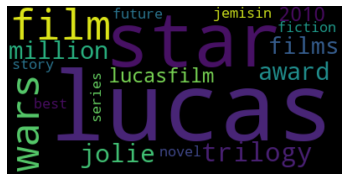

In [68]:
words = topic_word_distributions.loc['Topic 2'].sort_values(ascending=False).head(18)
words 

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

000           0.209735
0062204707    0.194032
02            0.228112
0252061400    0.182179
0316257442    0.217655
0345428820    0.174812
0345428844    0.230549
0345455741    0.182558
0345475732    0.201403
0345494764    0.169955
0345511294    0.243307
036           0.224370
0385535922    0.192044
0393652673    0.197148
0431906335    0.236493
05            0.229661
0517546772    0.236390
08            0.209394
0810949683    0.239243
0814757925    0.217492
Name: Topic 2, dtype: float64


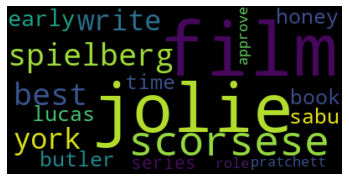

In [66]:
words = topic_word_distributions.loc['Topic 4'].sort_values(ascending=False).head(18)
words 

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Stage Two: Using the topic modeling code as a starter, build a topic model of the documents

Topic modeling aided the directors pulled in were now used as a resource toward a viable topic model presentation.  Ranging from "directors/Adam_Curtis.txt" to "directors/Mia_Hansen-Love.txt," this journey was accomplished, which was stored and represented in the path "directors/" encasing file names. As a result, "Feelings and stories of being surveilled are a form of evidence" (Benjamin 80). While an "Interface is always an argument, and combines presentation (form/format), representation (contents), navigation (wayfinding), orientation (location/breadcrumbs), and connections to the network (links and social media)" (Drucker 181).


In [63]:
import IMDb
import os
path = "IMDb/"

In [64]:
films = ["The Great","Ted Lasso","Bruised","Locke & Key","Tiger King"]
for films in IMDb:
    page = IMDb.page(films)
    print(page.title)
    filename = path + films.replace(" ","_") + ".txt"
    with open (filename, "w", encoding="utf-8", errors="ignore") as f:
        f.write(page.content)
        f.close()

TypeError: 'module' object is not iterable

In [54]:
import pandas as pd
import os
import numpy as np

documents = []
path = 'IMDb/'

filenames=sorted([os.path.join(path, fn) for fn in os.listdir(path)])
print(len(filenames)) # count files in corpus
print(filenames[:12]) # print names of 1st 12 files in corpus

0
[]


Importing sklearn (scikit) learn's CountVectorizer, helps to enhance and organize a document-term matrix. This enables filtering with the removal of "words, in this pedagogical setting to reduce the considerable time required to fit the topic model" (Karsdorp, Kestemont, Riddell 297). 

In [55]:
import sklearn.feature_extraction.text as text

vectorizer=text.CountVectorizer(input='filename', stop_words="english", min_df=1)
dtm=vectorizer.fit_transform(filenames).toarray() # defines document term matrix

vocab=np.array(vectorizer.get_feature_names())

ValueError: empty vocabulary; perhaps the documents only contain stop words

Enforcing 17 articles/documents oddly coming together with the term matrix found in film as “One of the most iconic scenes from The Matrix film trilogy deals with the power of predictions and self-fulfilling prophecies” (Benjamin 84). 

In [56]:
print(f'Shape of document-term matrix: {dtm.shape}. '
      f'Number of tokens {dtm.sum()}')

Shape of document-term matrix: (17, 9581). Number of tokens 42719


In association with the use of the mixture model the "topic-word distributions" there was use of reference of "document-topic distributions" by importing "sklearn.decomposition as decomposition  model = decomposition.LatentDirichletAllocation(  n_components=100, learning_method='online', random_state=1)" (Karsdorp, Kestemont, Riddell 300).  Here 100 topics to create patterns 

In [57]:
import sklearn.decomposition as decomposition
model = decomposition.LatentDirichletAllocation(
    n_components=100, learning_method='online', random_state=1)
document_topic_distributions = model.fit_transform(dtm)
vocabulary = vectorizer.get_feature_names()
# (# topics, # vocabulary)
assert model.components_.shape == (100, len(vocabulary))
# (# documents, # topics)
assert document_topic_distributions.shape == (dtm.shape[0], 100)  

NotFittedError: Vocabulary not fitted or provided

In this section, there was a use to take advantage of a parameter's  topic association with a "vocabulary element... converting the arrays which hold the parameter estimates into DataFrames with named rows and columns.  topic_names = [f'Topic {k}' for k in range(100)]  topic_word_distributions = pd.DataFrame(  model.components_, columns=vocabulary, index=topic_names)" (Karsdorp, Kestemont, Riddell 301). 

In [58]:
topic_names = [f'Topic {k}' for k in range(100)]
topic_word_distributions = pd.DataFrame(
    model.components_, columns=vocabulary, index=topic_names)
print(topic_word_distributions)

               000  0062204707        02  0252061400  0316257442  0345428820  \
Topic 0   0.239674    0.192002  0.193825    0.183861    0.239989    0.189205   
Topic 1   0.186044    0.197449  0.187473    0.193795    0.218828    0.225475   
Topic 2   0.209735    0.194032  0.228112    0.182179    0.217655    0.174812   
Topic 3   0.216428    0.186337  0.191848    0.202245    0.212644    0.184817   
Topic 4   0.199050    0.199901  0.191647    0.209342    0.200201    0.207283   
...            ...         ...       ...         ...         ...         ...   
Topic 95  0.189966    0.210739  0.193293    0.202363    0.231056    0.194162   
Topic 96  0.164812    0.193523  0.238616    0.198727    0.225409    0.210277   
Topic 97  0.210217    0.183445  0.177579    0.214921    0.216195    0.231066   
Topic 98  0.240047    0.232953  0.180106    0.154621    0.183514    0.232676   
Topic 99  1.778020    0.230897  0.212783    0.963061    0.204757    0.183130   

          0345428844  0345455741  03454

This was an exploratory section where I altered the extraction direction through signification of "document_topic_distributions.loc" ['Topic's'] (Karsdorp, Kestemont, Riddell 301). Fame and fortune are represented with wiki research components "The Matrix offers a potent allegory for thinking about power, technology, and society" (Benjamin 84-85). 

In [59]:
topic_word_distributions.loc['Topic 9'].sort_values(ascending=False).head(18)

spielberg    0.453281
film         0.381305
jolie        0.362545
director     0.304452
butler       0.300933
fiction      0.300875
received     0.296121
new          0.292892
ticket       0.289466
1999         0.286045
19           0.285344
rowley       0.284518
motel        0.284273
wing         0.283955
series       0.283368
father       0.282329
best         0.282213
starring     0.281693
Name: Topic 9, dtype: float64

"Word Cloud" generates some frequencies and sees the visually impactful visionary displays as practical strategies for finding the maximum parameters in typical mixture models with "Expectation maximization" is common. The scikit-learn library provides a convenient way of estimating the parameters here as "following lines of code suffice to estimate all the parameters of interest" (Karsdorp, Kestemont, Riddell 291). 

000           0.209735
0062204707    0.194032
02            0.228112
0252061400    0.182179
0316257442    0.217655
0345428820    0.174812
0345428844    0.230549
0345455741    0.182558
0345475732    0.201403
0345494764    0.169955
0345511294    0.243307
036           0.224370
0385535922    0.192044
0393652673    0.197148
0431906335    0.236493
05            0.229661
0517546772    0.236390
08            0.209394
0810949683    0.239243
0814757925    0.217492
Name: Topic 2, dtype: float64


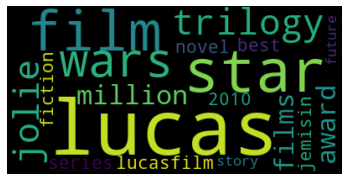

In [60]:
words = topic_word_distributions.loc['Topic 2'].sort_values(ascending=False).head(18)
words 

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

000           0.209735
0062204707    0.194032
02            0.228112
0252061400    0.182179
0316257442    0.217655
0345428820    0.174812
0345428844    0.230549
0345455741    0.182558
0345475732    0.201403
0345494764    0.169955
0345511294    0.243307
036           0.224370
0385535922    0.192044
0393652673    0.197148
0431906335    0.236493
05            0.229661
0517546772    0.236390
08            0.209394
0810949683    0.239243
0814757925    0.217492
Name: Topic 2, dtype: float64


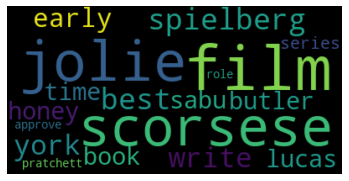

In [61]:
words = topic_word_distributions.loc['Topic 4'].sort_values(ascending=False).head(18)
words 

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [62]:
words = topic_word_distributions.loc['Topic 9'].sort_values(ascending=False).head(18)
words 

spielberg    0.453281
film         0.381305
jolie        0.362545
director     0.304452
butler       0.300933
fiction      0.300875
received     0.296121
new          0.292892
ticket       0.289466
1999         0.286045
19           0.285344
rowley       0.284518
motel        0.284273
wing         0.283955
series       0.283368
father       0.282329
best         0.282213
starring     0.281693
Name: Topic 9, dtype: float64

The use of "plotting, for each year,... can, in effect, calculate the total number of words in  all opinions published in a given year associated with a topic by multiplying  opinion lengths by the estimated topic shares" (Karsdorp, Kestemont, Riddell 315). 

000           0.209735
0062204707    0.194032
02            0.228112
0252061400    0.182179
0316257442    0.217655
0345428820    0.174812
0345428844    0.230549
0345455741    0.182558
0345475732    0.201403
0345494764    0.169955
0345511294    0.243307
036           0.224370
0385535922    0.192044
0393652673    0.197148
0431906335    0.236493
05            0.229661
0517546772    0.236390
08            0.209394
0810949683    0.239243
0814757925    0.217492
Name: Topic 2, dtype: float64


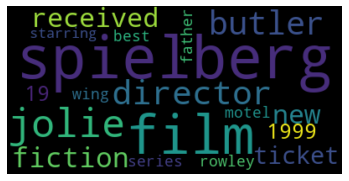

In [25]:


from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Stage Three: Using the sentiment analysis code as a starter, run a sentiment analysis on sample fragments from the documents and compare

The level of fandom in Wikipedia and what goes on the page enabled the analyzer to stand neutral on contributors who chose people they decide to write about as "An interface constructs a narrative" (Drucker 183).

In [26]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dlawb\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dlawb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Notes: The compounded polarity of each article simulates differences or similarities of negative or positive sentence components. Filenames were explored locally, with folders created.  In the end, encoding is not concerned about errors and send them to documents, printing them after filenames while checking out differences between large or small.

In [27]:
for filename in filenames:
    with open(filename, encoding="utf-8") as f:
        text = f.read()
        documents.append(text)
        scores = sid.polarity_scores(text[0:500])
    print(filename)
    for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')
    print(' ')

directors/Adam_Curtis.txt
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0,  
directors/Angelina_Jolie.txt
compound: 0.8979, neg: 0.0, neu: 0.863, pos: 0.137,  
directors/Annalee_Newitz.txt
compound: 0.4215, neg: 0.0, neu: 0.964, pos: 0.036,  
directors/Charlie_Jane_Anders.txt
compound: 0.9601, neg: 0.022, neu: 0.762, pos: 0.216,  
directors/Daniel_Myrick.txt
compound: -0.6159, neg: 0.139, neu: 0.765, pos: 0.096,  
directors/George_Lucas.txt
compound: 0.8714, neg: 0.04, neu: 0.812, pos: 0.148,  
directors/Jodie_Foster.txt
compound: 0.98, neg: 0.0, neu: 0.722, pos: 0.278,  
directors/M._Night_Shyamalan.txt
compound: 0.296, neg: 0.077, neu: 0.822, pos: 0.101,  
directors/Martin_Scorsese.txt
compound: 0.6801, neg: 0.064, neu: 0.82, pos: 0.116,  
directors/Mia_Hansen-Love.txt
compound: 0.9861, neg: 0.02, neu: 0.655, pos: 0.325,  
directors/N.K._Jemisin.txt
compound: 0.8271, neg: 0.083, neu: 0.752, pos: 0.165,  
directors/Octavia_Butler.txt
compound: -0.3384, neg: 0.068, neu: 0.894, pos: 0.038, 

## Stage Four: Using the Markov chain code as a starter, generate a sentence using one of the documents
Herewith the use of Markov chain code, a sentence from a document became vivid toward a noncontinuous generated text 




In [28]:
import markovify
import random
generator_text = ""

for document in documents:
    generator_text += document

Text pushed through the model to look clean as benefits of "Interface designs often depend upon cultural practices or conventions that may not be legible to users from another background" (Drucker 188).

In [29]:
text_model = markovify.Text(text)
print( text_model.make_sentence() )

A third volume, Father Christmas's Fake Beard, was released on 18 June 2013.


## Stage Five: Using the Markov chain code as a starter, generate a longer text fragment using all of the documents
Achieved a significant moment of generating book novel set up and what words that follow. As many interfaces welcome the use of a "universal" reader with an "omniscient" viewer, "but no such person exists, and each  individual will respond to the contents and the organization of a site in accord with their own background, experience, and expectations" (Drucker 190).




In [30]:
novel = ''
while (len( novel.split(" ")) < 500):
  for i in range(random.randrange(3,9)):
    novel += text_model.make_sentence() + " "
  novel += "\n\n"

print(novel)

=== Style and themes === Pratchett had mentioned two new texts, Scouting for Trolls and a 6.8% audience share. The Magic of Terry Pratchett First Novel Award === Pratchett had an observatory built in his flat in a much more sophisticated way than in print. He developed an interest in science fiction conventions from about 1963–1964, but stopped a few years before, which doctors believed had damaged the right side of his brain. 

=== Sir Terry would be the recipient of the debating society and wrote stories for the BBC, and became a patron for Alzheimer's Research UK. With satisfyingly multilayered plots, Pratchett's humor honors the intelligence of the novels in the first in Manchester in 1996, then worldwide, often with the same physics as ours. He made an appearance on the best-seller list; he was a contributor to the black desert under the title A Blink of the reader. Pratchett also collaborated with British science fiction novelists, the Terry Pratchett First Novel Award === Pratch